General instructions
====================


In [1]:
# Import and Init the main tools
# If for some reason you do not want to cache your data you can pass 
# 'cache_data=False' to the CachedDataLoader constructor.  

from lib.cached_data_loader import CachedDataLoader
from lib.panda_plotter import PandaPlotter
cdl = CachedDataLoader()
pp = PandaPlotter()


In [4]:
# Get hold of the dataframe 
sql = 'SELECT v.ts AS TS, v.mqtt_count AS BATCH_COUNT FROM v__wcb__h__record_counts AS v'
df = cdl.get_dataframe(sql, reindex=True)
# df.describe()

In [5]:
# Filter a specific time period by mask
mask = (df['TS'] >= '2019-10-21 00:00:00') & (df['TS'] < '2019-10-26 00:00:00')
mdf = df.loc[mask]
# mdf.describe()


[ 0  2  4  6  8 10 12]


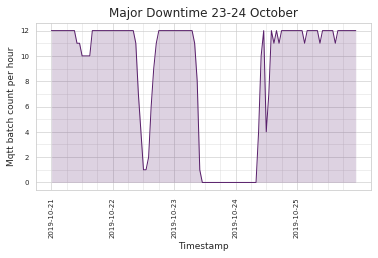

In [7]:
# Plot it
plotconfig = {
    "plot_title": "Major Downtime 23-24 October",
    "kind": "line",
    "x_column": "TS",
    "y_column": "BATCH_COUNT",
    "x_label": "Timestamp",
    "y_label": "Mqtt batch count per hour",
    "palette_color": "purple"
}
pp.plot(plotconfig, mdf, show=False)